In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Ans. to the ques. no 1

In [2]:
df = pd.read_csv('final-employee-ds.csv')

arr = np.array(df['TrainingHours'])
arr = arr.astype(float)

training_mean = arr.mean()
training_std = arr.std()

print(training_mean, round(training_std,2))

24.19 13.84


## Ans. to the ques. no 2

In [3]:
group = df.groupby('Department')['Salary']
median = group.median()

for department in df['Department'].unique():
  df.loc[((df['Department']==department) & (df['Salary'].isna()) ), 'Salary'] = median.loc[department]

sum = df.loc[((df['ExperienceYears']>12) & (df['ProjectCount']>5)),'Salary'].sum()
print(sum)

1985775.5


## Ans. to the ques. no 3

In [4]:
df_temp = df.loc[( ((df['Department']=='IT') | (df['Department']=='Finance')) &
 ((df['Age']>=30) & (df['Age']<=45)) &
  (df['PerformanceScore']>88))]

df_temp = df_temp.sort_values(['Salary'],ascending=False)
df_temp.loc[:,['Name','Department','Salary','PerformanceScore']]

,Name,Department,Salary,PerformanceScore
94,Employee_95,IT,140386.0,94
88,Employee_89,Finance,126027.0,92
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98
55,Employee_56,Finance,49540.0,94


## Ans. to the ques. no 4

In [5]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek']*4)
filtered_df = df.loc[:,['Name','SalaryPerHour']]
filtered_df = filtered_df.sort_values(['SalaryPerHour'],ascending=False)
filtered_df.head(5)

,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


## Ans. to the ques. no 5

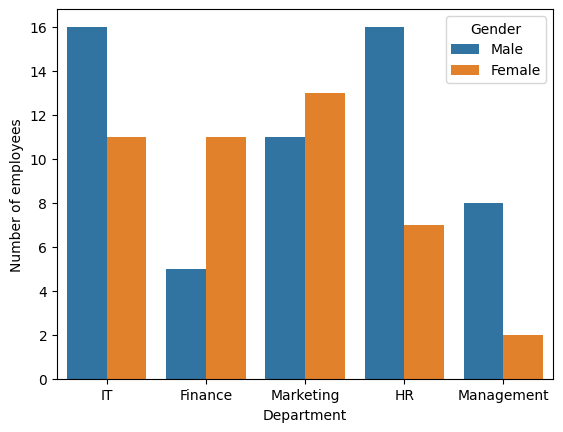

In [6]:
# male = df.loc[(df['Gender']=='Male')]
# female = df.loc[(df['Gender']=='Female')]
# sns.countplot(data=male, x='Department',label='Male', alpha=0.5)
# sns.countplot(data=female, x='Department',label='Female', alpha=0.5)
# plt.legend()

sns.countplot(data=df, x='Department', hue='Gender')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.show()
